In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import sys

sys.path.append("..")

from opdynamics.utils.reading_tools import (parse_experiment_params,
                                            make_tuple,
                                            count_experiment_runs)
from opdynamics.utils.results_tools import get_experiment_mean_data
from opdynamics.utils.plotting.formatting import (classical_structure,
                                                  format_text)

In [4]:
curve_epsilon = {}
counts = {}
for e, n in [(1e-4, 4), (1e-5, 5), (1e-6, 6), (1e-7, 7), (1e-8, 8)]:
    results_path = f"../results/epsilon_{n}_kappa_25"
    params_path  = f"../experiments_params/run_analysis_epsilon_{n}_kappa_25.json"
    params = parse_experiment_params(params_path)
    results = get_experiment_mean_data(params, results_path)

    curve_epsilon[e] = results
    counts[e] = count_experiment_runs(params, results_path)
    
epsilons = [1e-4, 1e-5, 1e-6, 1e-7, 1e-8]

for n in [4, 5, 6, 7, 8]:
    params_path  = f"../experiments_params/run_analysis_epsilon_{n}_kappa_25.json"
    params = parse_experiment_params(params_path)

    count_per_param = {}
    for param in params:
        epsin_runs = []
        for e in epsilons:
            epsin_runs.append((e, counts[e][make_tuple(param)]))
        count_per_param[make_tuple(param)] = epsin_runs

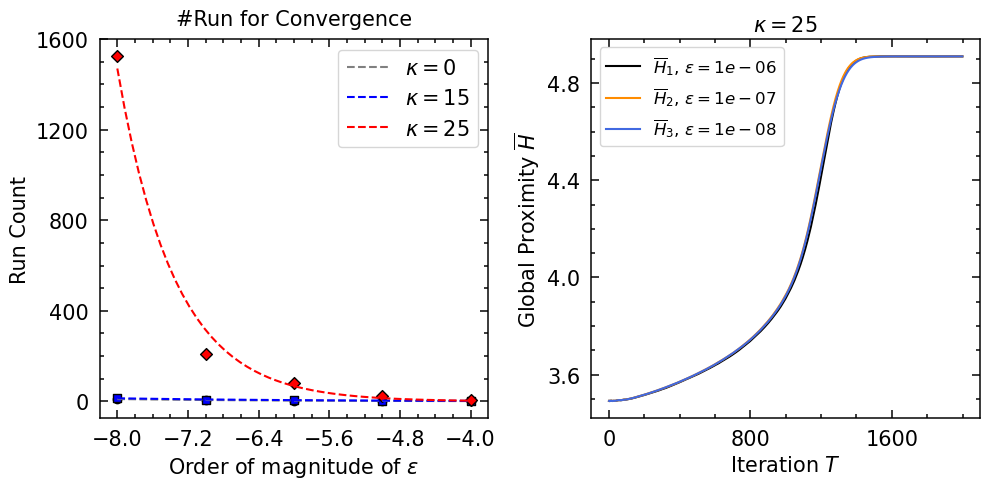

In [11]:
nrows = 1
ncols = 2

fig, ax = plt.subplots(ncols = ncols, nrows = nrows, figsize = (5*ncols, 5*nrows))

titles = ["#Run for Convergence", "Global Entropy", "Global Entropy"]
title_size = 15
single_ylabel = True
position_ylabel = "left"
ylabel = r"Run Count"
ylabel_fontsize = 15
xlabel_bottom_only = True
xlabel = r"Order of magnitude of $\epsilon$"
xlabel_fontsize = 15
axis_width = 1.08
tick_pad = 8
tick_label_size = 15
num_x_ticks = 7
num_y_ticks= 5

_ = classical_structure(
    fig,
    ax[0],
    axis_width,
    tick_pad,
    tick_label_size,
    num_x_ticks,
    num_y_ticks
)

_ = format_text(
    fig,
    ax[0],
    titles,
    title_size,
    single_ylabel,
    position_ylabel,
    ylabel,
    ylabel_fontsize,
    xlabel_bottom_only,
    xlabel,
    xlabel_fontsize
)


params = list(count_per_param.keys())

markers = {
    0: 'o',
    15: 's',
    25: 'D'
}
color = {
    0: 'grey',
    15: 'b',
    25: 'r'
}

for k, param in enumerate(params):
    x = [-4, -5, -6, -7, -8]
    y = [x[1] for x in count_per_param[param]]
    
    ax[0].scatter(x, y, marker = markers[param[4]], c = color[param[4]], edgecolors = 'k')
    
    p = np.polyfit(x, np.log(y), 1, w = np.sqrt(y))
    a = np.exp(p[1])
    b = p[0]
    x_fitted = np.linspace(np.min(x), np.max(x), 50)
    y_fitted = a * np.exp(b * x_fitted)
    ax[0].plot(x_fitted, y_fitted, '--', label = rf"$\kappa = {param[4]}$", color = color[param[4]])
    
ax[0].legend(loc = 'upper right', fontsize = 15)


title_size = 15
single_ylabel = True
position_ylabel = "left"
ylabel = r"Global Proximity $\overline{H}$"
ylabel_fontsize = 15
xlabel_bottom_only = True
xlabel = r"Iteration $T$"
xlabel_fontsize = 15
axis_width = 1.08
tick_pad = 8
tick_label_size = 15
num_x_ticks = 3
num_y_ticks= 5

_ = classical_structure(
    fig,
    ax[1],
    axis_width,
    tick_pad,
    tick_label_size,
    num_x_ticks,
    num_y_ticks
)

_ = format_text(
    fig,
    ax[1],
    titles,
    title_size,
    single_ylabel,
    position_ylabel,
    ylabel,
    ylabel_fontsize,
    xlabel_bottom_only,
    xlabel,
    xlabel_fontsize
)

param = params[2]


c1 = curve_epsilon[1e-6][param]["entropy"]
c2 = curve_epsilon[1e-7][param]["entropy"]
c3 = curve_epsilon[1e-8][param]['entropy']
error1 = ((c2 - c1)**2).mean()
error2 = ((c3 - c2)**2).mean()

ax[1].plot(range(len(c1)), c1, c = 'k', label = r"$\overline{H}_1$" + ", " + rf"$\epsilon = {1e-6}$")
ax[1].plot(range(len(c1)), c2, c = 'darkorange', label = r"$\overline{H}_2$" + ", " + rf"$\epsilon = {1e-7}$")
ax[1].plot(range(len(c1)), c3, c = 'royalblue', label = r"$\overline{H}_3$" + ", " + rf"$\epsilon = {1e-8}$")
ax[1].set_title(fr"$\kappa = {param[4]}$", fontsize = title_size)
ax[1].legend(fontsize = 12)

# ax[1].text(60, 4.40, r"RMSE($\overline{H}_2 - \overline{H}_1$) = " + f"{np.round(error1, 6)}")
# ax[1].text(60, 4.30, r"RMSE($\overline{H}_3 - \overline{H}_2$) = " + f"{np.round(error2, 6)}")

fig.tight_layout()

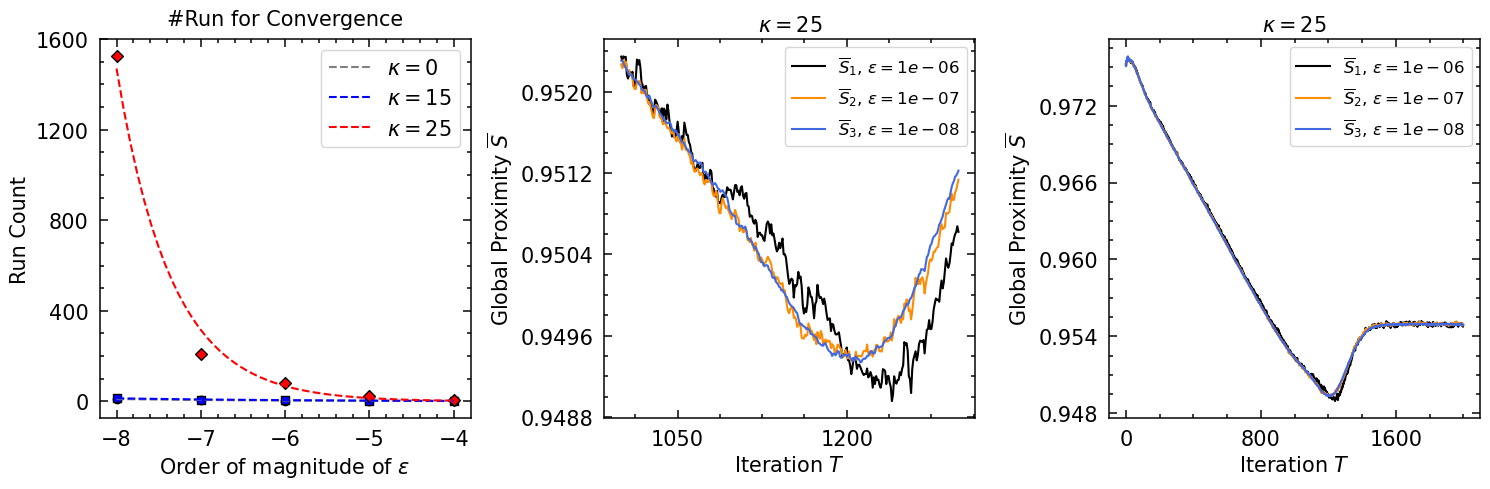

In [5]:
nrows = 1
ncols = 3

fig, ax = plt.subplots(ncols = ncols, nrows = nrows, figsize = (5*ncols, 5*nrows))

titles = ["#Run for Convergence", "Global Entropy", "Global Entropy"]
title_size = 15
single_ylabel = True
position_ylabel = "left"
ylabel = r"Run Count"
ylabel_fontsize = 15
xlabel_bottom_only = True
xlabel = r"Order of magnitude of $\epsilon$"
xlabel_fontsize = 15
axis_width = 1.08
tick_pad = 8
tick_label_size = 15
num_x_ticks = 5
num_y_ticks= 5

_ = classical_structure(
    fig,
    ax[0],
    axis_width,
    tick_pad,
    tick_label_size,
    num_x_ticks,
    num_y_ticks
)

_ = format_text(
    fig,
    ax[0],
    titles,
    title_size,
    single_ylabel,
    position_ylabel,
    ylabel,
    ylabel_fontsize,
    xlabel_bottom_only,
    xlabel,
    xlabel_fontsize
)


params = list(count_per_param.keys())

markers = {
    0: 'o',
    15: 's',
    25: 'D'
}
color = {
    0: 'grey',
    15: 'b',
    25: 'r'
}

for k, param in enumerate(params):
    x = [-4, -5, -6, -7, -8]
    y = [x[1] for x in count_per_param[param]]
    
    ax[0].scatter(x, y, marker = markers[param[4]], c = color[param[4]], edgecolors = 'k')
    
    p = np.polyfit(x, np.log(y), 1, w = np.sqrt(y))
    a = np.exp(p[1])
    b = p[0]
    x_fitted = np.linspace(np.min(x), np.max(x), 50)
    y_fitted = a * np.exp(b * x_fitted)
    ax[0].plot(x_fitted, y_fitted, '--', label = rf"$\kappa = {param[4]}$", color = color[param[4]])
    
ax[0].legend(loc = 'upper right', fontsize = 15)


title_size = 15
single_ylabel = True
position_ylabel = "left"
ylabel = r"Global Proximity $\overline{S}$"
ylabel_fontsize = 15
xlabel_bottom_only = True
xlabel = r"Iteration $T$"
xlabel_fontsize = 15
axis_width = 1.08
tick_pad = 8
tick_label_size = 15
num_x_ticks = 3
num_y_ticks= 5

_ = classical_structure(
    fig,
    ax[1],
    axis_width,
    tick_pad,
    tick_label_size,
    num_x_ticks,
    num_y_ticks
)

_ = format_text(
    fig,
    ax[1],
    titles,
    title_size,
    single_ylabel,
    position_ylabel,
    ylabel,
    ylabel_fontsize,
    xlabel_bottom_only,
    xlabel,
    xlabel_fontsize
)

param = params[2]


c1 = curve_epsilon[1e-6][param]["proximity"]
c2 = curve_epsilon[1e-7][param]["proximity"]
c3 = curve_epsilon[1e-8][param]['proximity']
error1 = ((c2 - c1)**2).mean()
error2 = ((c3 - c2)**2).mean()

ax[1].plot(range(len(c1))[1000:1300], c1[1000:1300], c = 'k', label = r"$\overline{S}_1$" + ", " + rf"$\epsilon = {1e-6}$")
ax[1].plot(range(len(c1))[1000:1300], c2[1000:1300], c = 'darkorange', label = r"$\overline{S}_2$" + ", " + rf"$\epsilon = {1e-7}$")
ax[1].plot(range(len(c1))[1000:1300], c3[1000:1300], c = 'royalblue', label = r"$\overline{S}_3$" + ", " + rf"$\epsilon = {1e-8}$")
ax[1].set_title(fr"$\kappa = {param[4]}$", fontsize = title_size)
ax[1].legend(fontsize = 12)

# ax[1].text(60, 4.40, r"RMSE($\overline{H}_2 - \overline{H}_1$) = " + f"{np.round(error1, 6)}")
# ax[1].text(60, 4.30, r"RMSE($\overline{H}_3 - \overline{H}_2$) = " + f"{np.round(error2, 6)}")


title_size = 15
single_ylabel = True
position_ylabel = "left"
ylabel = r"Global Proximity $\overline{S}$"
ylabel_fontsize = 15
xlabel_bottom_only = True
xlabel = r"Iteration $T$"
xlabel_fontsize = 15
axis_width = 1.08
tick_pad = 8
tick_label_size = 15
num_x_ticks = 3
num_y_ticks= 5

_ = classical_structure(
    fig,
    ax[2],
    axis_width,
    tick_pad,
    tick_label_size,
    num_x_ticks,
    num_y_ticks
)

_ = format_text(
    fig,
    ax[2],
    titles,
    title_size,
    single_ylabel,
    position_ylabel,
    ylabel,
    ylabel_fontsize,
    xlabel_bottom_only,
    xlabel,
    xlabel_fontsize
)

param = params[2]


c1 = curve_epsilon[1e-6][param]["proximity"]
c2 = curve_epsilon[1e-7][param]["proximity"]
c3 = curve_epsilon[1e-8][param]['proximity']
error1 = ((c2 - c1)**2).mean()
error2 = ((c3 - c2)**2).mean()

ax[2].plot(range(len(c1)), c1, c = 'k', label = r"$\overline{S}_1$" + ", " + rf"$\epsilon = {1e-6}$")
ax[2].plot(range(len(c1)), c2, c = 'darkorange', label = r"$\overline{S}_2$" + ", " + rf"$\epsilon = {1e-7}$")
ax[2].plot(range(len(c1)), c3, c = 'royalblue', label = r"$\overline{S}_3$" + ", " + rf"$\epsilon = {1e-8}$")
ax[2].set_title(fr"$\kappa = {param[4]}$", fontsize = title_size)
ax[2].legend(fontsize = 12)

fig.tight_layout()

0.0001 1e-05 kappa =  25 0.00019215111914073235
1e-05 1e-06 kappa =  25 6.553140454854087e-05
1e-06 1e-07 kappa =  25 0.00015443960060705845
1e-07 1e-08 kappa =  25 8.206225992372774e-06


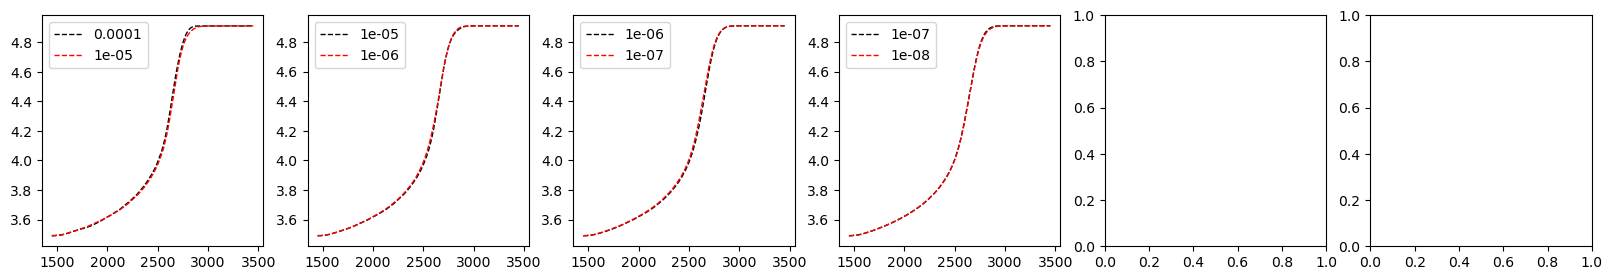

In [46]:
param = make_tuple(params[1])

fig, ax = plt.subplots(ncols = 6, figsize = (20, 3))

for k, (e1, e2) in enumerate(zip(epsilons[:-1], epsilons[1:])):
    c1 = curve_epsilon[e1][param]["entropy"]
    c2 = curve_epsilon[e2][param]["entropy"]
    error = ((c2 - c1)**2).mean()
    
    ax[k].plot(range(1450, 1450 + len(c1)), c1, c = 'k', label = e1, linewidth = 1, linestyle = "--")
    ax[k].plot(range(1450, 1450 + len(c1)), c2, c = 'r', label = e2, linewidth = 1, linestyle = '--')
    ax[k].set_xlabel = "time"
    ax[k].set_ylabel = "Entropy"
    ax[k].set_title = f"Kappa = {param[4]}" + " ; "+ f"Error: {error}"
    
    print(e1, e2, "kappa = ", param[4], error)
    
    ax[k].legend()

In [45]:
np.argwhere(c2.round(2) == c2.max().round(2))[0][0]

1462

0.0001 1e-05 kappa =  25 2.52095801249069e-07
1e-05 1e-06 kappa =  25 6.545500690662327e-07
1e-06 1e-07 kappa =  25 7.852522438706795e-07
1e-07 1e-08 kappa =  25 7.189629832585182e-08


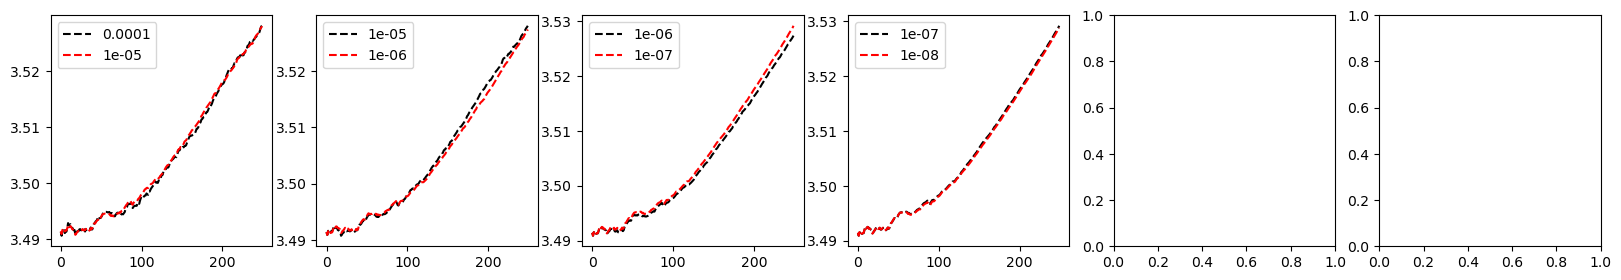

In [23]:
param = make_tuple(params[1])

fig, ax = plt.subplots(ncols = 6, figsize = (20, 3))

for k, (e1, e2) in enumerate(zip(epsilons[:-1], epsilons[1:])):
    c1 = curve_epsilon[e1][param]["entropy"][0:250]
    c2 = curve_epsilon[e2][param]["entropy"][0:250]
    error = ((c2 - c1)**2).mean()
    
    ax[k].plot(range(len(c1)), c1, c = 'k', label = e1, linewidth = 1.5, linestyle = "--")
    ax[k].plot(range(len(c1)), c2, c = 'r', label = e2, linewidth = 1.5, linestyle = '--')
    ax[k].set_xlabel = "time"
    ax[k].set_ylabel = "Entropy"
    ax[k].set_title = f"Kappa = {param[4]}" + " ; "+ f"Error: {error}"
    
    print(e1, e2, "kappa = ", param[4], error)
    
    ax[k].legend()

0.0001 1e-05 kappa =  25 8.000655532166609e-07
1e-05 1e-06 kappa =  25 1.7834924715279815e-07
1e-06 1e-07 kappa =  25 1.077230916600619e-07
1e-07 1e-08 kappa =  25 1.4959511898204718e-08


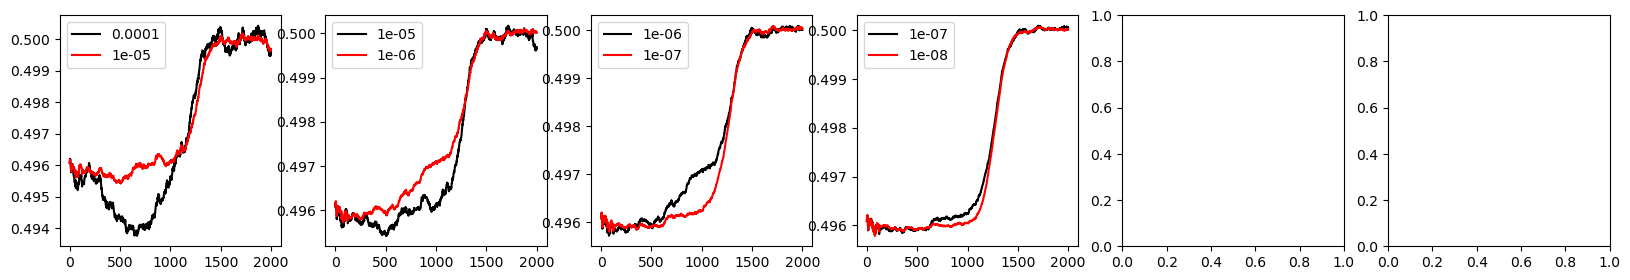

In [27]:
param = make_tuple(params[1])

fig, ax = plt.subplots(ncols = 6, figsize = (20, 3))

for k, (e1, e2) in enumerate(zip(epsilons[:-1], epsilons[1:])):
    c1 = curve_epsilon[e1][param]["polarity"]
    c2 = curve_epsilon[e2][param]["polarity"]
    error = ((c2 - c1)**2).mean()
    
    ax[k].plot(range(len(c1)), c1, c = 'k', label = e1)
    ax[k].plot(range(len(c1)), c2, c = 'r', label = e2)
    ax[k].set_xlabel = "time"
    ax[k].set_ylabel = "Entropy"
    ax[k].set_title = f"Kappa = {param[4]}" + " ; "+ f"Error: {error}"
    
    print(e1, e2, "kappa = ", param[4], error)
    
    ax[k].legend()